## Data Mining and Analysis

## Name: Anjali Singh

Part 1 & Part 2 are content-based analysis.<br>
Part 1 contains exploratory data analysis to answer questions related to movie ratings and box office success <br>
Part 2 perhaps requires a longer time and more efforts where I develop a machine learning model (Naive Bayes classifier) to classify movie ratings to be Rotten or Fresh based on their reviews. <br>
Part 3 examines the structure of networks and discuss network properties.

Packages used.

In [2]:
# data analysis
import pandas as pd
import numpy as np
# text processing
import nltk
# machine learning
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# social network analysis
import networkx as net
# plotting
import matplotlib.pyplot as plt
%matplotlib inline

import itertools

# You can import other packages if necessary

## Part 1 - Exploring Movie Data

In this part, we will work with the following dataset:
* movies.csv - This dataset contains a sample of movies including movie info, box office gross revenues, as well as audience and critic ratings. The dataset combines data from multiple sources: Rotten Tomatoes, The Numbers, and IMDB. The variable names started with 'rt' indicate the ones collected from the Rotten Tomatoes. For example, the variable 'rtAllCriticsRating' is average movies ratings from the Rotten Tomatoes critics.

You will perform two pieces of exploratory data analysis. 
If you are not familiar with the Rotten Tomatoes or IMDB, go spend some time to explore the websites. Here is an example movie page on the Rotten Tomatoes: https://www.rottentomatoes.com/m/the_theory_of_everything_2014

In [3]:
# Load the data
movies = pd.read_csv('a3-movies.csv')
movies.columns

Index(['id', 'title', 'imdbID', 'year', 'rtID', 'rtAllCriticsRating',
       'rtAllCriticsNumReviews', 'rtAllCriticsNumFresh',
       'rtAllCriticsNumRotten', 'rtAllCriticsScore', 'rtTopCriticsRating',
       'rtTopCriticsNumReviews', 'rtTopCriticsNumFresh',
       'rtTopCriticsNumRotten', 'rtTopCriticsScore', 'rtAudienceRating',
       'rtAudienceNumRatings', 'rtAudienceScore', 'US Gross',
       'Worldwide Gross', 'US DVD Sales', 'Production Budget', 'MPAA Rating',
       'Running Time (min)', 'Distributor', 'Source', 'Major Genre',
       'Creative Type', 'Director', 'IMDB Rating', 'IMDB Votes'],
      dtype='object')

In [4]:
movies.columns
movies.shape
movies_1 = movies.groupby(['Major Genre']).count() #count of movies by genre
movies_1

,id,title,imdbID,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,...,US DVD Sales,Production Budget,MPAA Rating,Running Time (min),Distributor,Source,Creative Type,Director,IMDB Rating,IMDB Votes
Major Genre,,,,,,,,,,,,,,,,,,,,,
Action,337,337,337,337,330,337,337,337,337,337,...,54,337,256,155,333,334,320,247,333,333
Adventure,206,206,206,206,204,206,206,206,206,206,...,48,206,174,118,205,206,201,143,204,204
Black Comedy,26,26,26,26,25,26,26,26,26,26,...,3,26,25,9,26,26,26,19,24,24
Comedy,525,525,525,525,519,525,525,525,525,525,...,83,524,459,229,522,519,500,304,517,517
Concert/Performance,3,3,3,3,3,3,3,3,3,3,...,0,3,3,1,3,3,3,1,3,3
Documentary,24,24,24,24,23,24,24,24,24,24,...,2,24,23,5,24,24,24,6,24,24
Drama,618,618,618,618,611,618,618,618,618,618,...,107,618,553,244,612,605,587,405,606,606
Horror,182,182,182,182,179,182,182,182,182,182,...,37,182,134,71,179,159,168,93,181,181
Musical,43,43,43,43,41,43,43,43,43,43,...,8,43,27,10,39,39,35,23,43,43


In [5]:
movies.head(5)

,id,title,imdbID,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,rtAllCriticsNumRotten,rtAllCriticsScore,...,Production Budget,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,IMDB Rating,IMDB Votes
0,1,Toy story,114709,1995,toy_story,9,73,73,0,100,...,30000000.0,G,NaN,Walt Disney Pictures,Original Screenplay,Adventure,Kids Fiction,John Lasseter,8.2,151143.0
1,2,Jumanji,113497,1995,1068044-jumanji,5.6,28,13,15,46,...,65000000.0,PG,NaN,Sony Pictures,Based on Book/Short Story,Adventure,Fantasy,Joe Johnston,6.4,54973.0
2,7,Sabrina,47437,1954,1018047-sabrina,7.4,31,28,3,90,...,58000000.0,PG,NaN,Paramount Pictures,Remake,Romantic Comedy,Contemporary Fiction,Sydney Pollack,6.0,15749.0
3,10,GoldenEye,113189,1995,goldeneye,6.8,41,33,8,80,...,60000000.0,PG-13,NaN,MGM,Based on Book/Short Story,Action,Contemporary Fiction,Martin Campbell,7.2,69199.0
4,11,The American President,112346,1995,american_president,7,49,44,5,89,...,62000000.0,PG-13,NaN,Sony Pictures,Original Screenplay,Romantic Comedy,Contemporary Fiction,Rob Reiner,6.8,22780.0


### 1.1. Box Office Success 

One of the overarching question would be: **what factors are associated with the box office success of movies?**

To answer this question, 
* What does the dataset look like? 
* What variables are you going to examine, and how? 
* What hypothese do you have?
* Are there any concerns or limitations of your analysis?

Please describe your detailed EDA strategies in words, then perform the proposed EDA and finally discuss your results. 


Step 1. EDA plan: I understand the question as what determines box office success. The simplest answer to this is, profit. The profit margin has been calculated against Distributor, Major Genre and Production Budget. 

In [6]:
# Step 2. Your codes for EDA
movies_budget = movies[["id","title","year",'US Gross','Worldwide Gross','US DVD Sales','Production Budget','Distributor','Major Genre','Running Time (min)']]
movies_budget = movies_budget.dropna()
movies_budget["Worldwide Gross"] = pd.to_numeric(movies_budget["Worldwide Gross"], errors = 'coerce')
movies["Distributor"]= movies["Distributor"].astype('category')
movies["Major Genre"]= movies["Major Genre"].astype('category')
movies_budget["Profit"] = movies_budget["Worldwide Gross"] - movies_budget["Production Budget"]
movies_budget["US Gross"]=pd.to_numeric(movies_budget["US Gross"], errors = 'coerce')

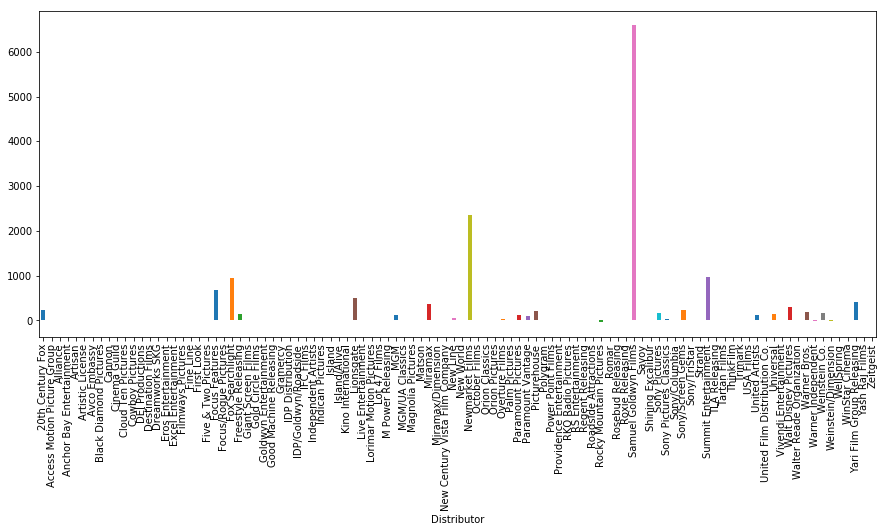

Distributor
Samuel Goldwyn Films    6590.295800
Newmarket Films         2347.597680
Summit Entertainment     971.459065
Fox Searchlight          950.501008
Focus Features           679.842404
Name: profit margin, dtype: float64


In [7]:
movies_budget["profit margin"]=(movies_budget["Profit"]/movies_budget["Production Budget"])*100
movies_budget['Major Genre'] = movies['Major Genre'].dropna()
movies_budget['Distributor'] = movies['Distributor'].dropna()
movies_data_genre =movies_budget.groupby(['Distributor'])['profit margin'].mean()
movies_data_genre

plt.figure(figsize=(15,6))
movies_data_genre.plot.bar()
plt.xticks(rotation='vertical')
plt.show()
print(movies_data_genre.sort_values(ascending=False)[:5])


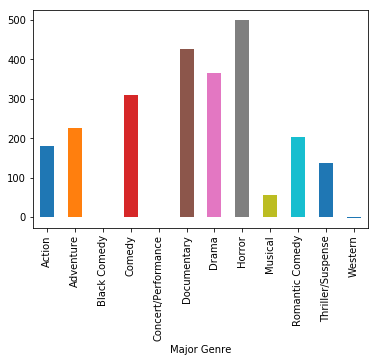

Major Genre
Horror         499.107215
Documentary    425.442960
Drama          364.028625
Comedy         310.056449
Adventure      226.147402
Name: profit margin, dtype: float64


In [8]:
movies_data_genre =movies_budget.groupby(['Major Genre'])['profit margin'].mean()
movies_data_genre.plot.bar()
plt.show()
print(movies_data_genre.sort_values(ascending=False)[:5])

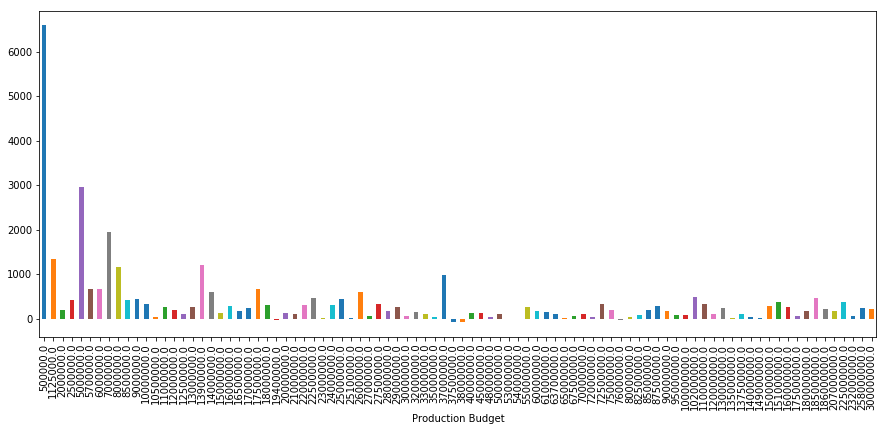

Production Budget
500000.0       6590.295800
5000000.0      2958.501860
7000000.0      1952.552000
1125000.0      1347.603822
13900000.0     1197.437129
8000000.0      1156.539762
37000000.0      971.459065
17500000.0      670.940051
6000000.0       663.334325
5700000.0       655.159421
14000000.0      601.186667
26000000.0      594.037192
102000000.0     484.671569
22500000.0      471.241329
185000000.0     452.619112
25000000.0      449.244056
9000000.0       437.963044
2500000.0       425.442960
8500000.0       419.656841
225000000.0     373.626583
151000000.0     369.054697
110000000.0     335.460139
27500000.0      335.329547
72500000.0      323.159051
10000000.0      317.818661
18000000.0      313.534875
24000000.0      301.190027
22000000.0      299.042543
150000000.0     291.402536
87500000.0      277.805393
                  ...     
12500000.0      101.536092
120000000.0      98.085497
33000000.0       97.716462
70000000.0       93.652393
137500000.0      91.526732
100000000.

In [9]:
movies_data_genre =movies_budget.groupby(['Production Budget'])['profit margin'].mean()
plt.figure(figsize=(15,6))
movies_data_genre.plot.bar()
plt.xticks(rotation='vertical')
plt.show()
print(movies_data_genre.sort_values(ascending=False))

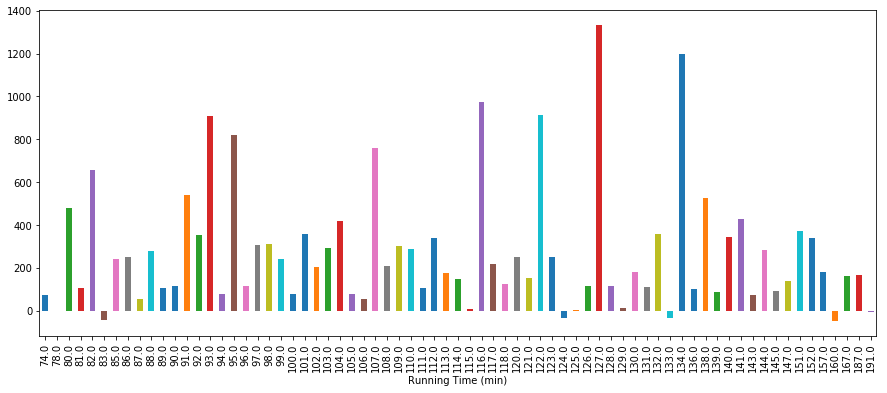

Running Time (min)
127.0    1334.481494
134.0    1197.437129
116.0     975.204821
122.0     914.038545
93.0      909.418460
95.0      818.623182
107.0     758.107199
82.0      655.159421
91.0      539.489038
138.0     525.645909
80.0      479.819354
141.0     428.892938
104.0     419.923583
151.0     373.626583
101.0     358.971487
132.0     358.844647
92.0      351.760575
140.0     342.529281
152.0     337.720135
112.0     337.652568
98.0      309.444650
97.0      307.306715
109.0     302.626729
103.0     294.133240
110.0     285.867153
144.0     283.724597
88.0      279.101218
120.0     252.377151
123.0     249.671803
86.0      248.844412
            ...     
114.0     148.090395
147.0     138.286808
118.0     125.311512
90.0      115.624851
96.0      114.933919
128.0     114.242432
126.0     113.848923
131.0     108.329372
89.0      107.775182
111.0     103.945607
81.0      103.421610
136.0      99.956382
145.0      90.012768
139.0      84.996522
105.0      78.062836
100.0      75.8

In [10]:
movies_data_genre =movies_budget.groupby(['Running Time (min)'])['profit margin'].mean()
plt.figure(figsize=(15,6))
movies_data_genre.plot.bar()
plt.xticks(rotation='vertical')
plt.show()
print(movies_data_genre.sort_values(ascending=False))

Step 3. Discussion: 
    Profit Margin is calculated instead of profit, and compared against various parameters. 
    1) When Profit Margin was compared against Distributors, two distributors have a higher profit margin than other distributors. 
    and the box office success does depend on the distributors. 
    2) Genres make a difference in determining the box office success, as genres like Horror and Documentary have a higher profit margin
    3)Production Budget does affect box office success as production budget around a certain range have a higher profit margin
    4) Lastly, movie having a run time of around 2 hours and 1.5 hours have a higher profit margin. 
    
    Limitations
    1) Profit Margin calculated instead of profit. 
    2) Assumptions made in picking up parameters to determine box office success. 
    3) Question understood as what determines box office success which is very vague, and can have many external factors. 

### 1.2. Consistency between movie ratings

Next, we will compare movie ratings given by critics versus audience on the Rotten tomatoes.

* Do users agree with critics in terms of movie ratings on the Rotten Tomatoes? When they do and when they don't?

Step 1. Your EDA plan: We first scale the two rating parameters. Critic Reading and Audience rating. 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


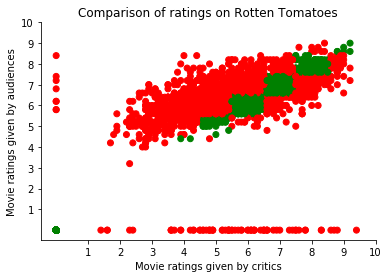

In [11]:
# Step 2. Your codes for EDA
movies["rtAllCriticsRating"] = pd.to_numeric(movies["rtAllCriticsRating"], errors='coerce')
movies["rtAudienceRating"] = pd.to_numeric(movies["rtAudienceRating"], errors='coerce')
movies["rtAudienceRating"] = movies["rtAudienceRating"] * 2

# subset data, and color code the data points based on our requirement
subset = movies[['rtAllCriticsRating', 'rtAudienceRating']]
temp_list = []
for row in subset.iterrows():
    if round(row[1]['rtAllCriticsRating']) == round(row[1]['rtAudienceRating']):
        temp_list.append('green')
    else:
        temp_list.append('red')
subset['point_color'] = temp_list

# plot the data points to visualize so that we can spot any patterns
ax = plt.subplot(111)
plt.scatter(x=subset['rtAllCriticsRating'], 
            y=subset['rtAudienceRating'], 
            c=subset['point_color'])
plt.xlabel("Movie ratings given by critics")
plt.ylabel("Movie ratings given by audiences")
plt.title("Comparison of ratings on Rotten Tomatoes")
plt.xticks(ticks=range(1,11))
plt.yticks(ticks=range(1,11))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

Step 3. Discussion:- Based on the above visualization, we can observe that the critics and audience generally tend to agree more on medium-high rated movies (movies with ratings above 4).
- Below the rating level of 4, audience and critics never seem to agree on a given movie - with one exception as stated below.
- There are a few movies that have been collectivelly rated zero by both critics and the audience.

## Part 2 - Analyzing Movie Reviews* 

Now let's move on to build a Naive Bayes classifier to predict whether a review is Fresh or Rotten, based on the text of the review. I have imported the dataset for you.

In [12]:
# Import movie reviews data
reviews = pd.read_csv("a3-reviews.csv")
reviews

,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
0,Derek Adams,fresh,114709,http://www.timeout.com/film/reviews/87745/toy-...,Time Out,"So ingenious in concept, design and execution ...",2009-10-04 00:00:00,9559,Toy Story
1,Richard Corliss,fresh,114709,"http://www.time.com/time/magazine/article/0,91...",TIME Magazine,The year's most inventive comedy.,2008-08-31 00:00:00,9559,Toy Story
2,David Ansen,fresh,114709,http://www.newsweek.com/id/104199,Newsweek,A winning animated feature that has something ...,2008-08-18 00:00:00,9559,Toy Story
3,Leonard Klady,fresh,114709,http://www.variety.com/review/VE1117941294.htm...,Variety,The film sports a provocative and appealing st...,2008-06-09 00:00:00,9559,Toy Story
4,Jonathan Rosenbaum,fresh,114709,http://onfilm.chicagoreader.com/movies/capsule...,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10 00:00:00,9559,Toy Story
5,Michael Booth,fresh,114709,http://www.denverpost.com/movies/ci_5786068,Denver Post,"As Lion King did before it, Toy Story revived ...",2007-05-03 00:00:00,9559,Toy Story
6,Geoff Andrew,fresh,114709,http://www.timeout.com/film/reviews/79673/toy_...,Time Out,The film will probably be more fully appreciat...,2006-06-24 00:00:00,9559,Toy Story
7,Janet Maslin,fresh,114709,http://movies.nytimes.com/movie/review?res=990...,New York Times,Children will enjoy a new take on the irresist...,2003-05-20 00:00:00,9559,Toy Story
8,Kenneth Turan,fresh,114709,http://www.calendarlive.com/movies/reviews/cl-...,Los Angeles Times,Although its computer-generated imagery is imp...,2001-02-13 00:00:00,9559,Toy Story
9,Roger Ebert,fresh,114709,http://www.rogerebert.com/reviews/toy-story-1995,Chicago Sun-Times,The result is a visionary roller-coaster ride ...,2000-01-01 00:00:00,9559,Toy Story


### 2.1 Text Cleaning and Unigram Representation

Before we get into the text classification, let's spend some time work with the reviews text! 

Are the reviews clean enough to you? As we will use bag-of-words representation here, we want to reduce the sparse representation. In this part, you will first clean the reviews by:

* Ignoring case
* Ignoring punctuation & extra whitespaces
* Removing stopwords

Then, you will tokenize the reviews; in other words, you are going to convert your text fields into "bag of words" vectors.
One thing that may help you in the following problems is the [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) object in Scikit-learn. This function also provides built-in methods to lower cases, remove punctuations, whitespaces and stopwords. Make sure you read the function documentation and review the lab demos to understand how the process goes. Eventually, you will get a bag-of-words array from your reviews data. Name your complete feature set as X and your target (i.e. rotten or fresh labels) as Y.

* X is a (nreview, nwords) array. Each row corresponds to a bag-of-words representation for a single review. This will be the input to your model.
* Y is a nreview-element 1/0 array, encoding whether a review is Fresh (1) or Rotten (0). This is the desired output from your model.

In [13]:
# Your codes here - for text cleaning & tokenizing
reviews_1 = reviews["quote"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews_1)
X

<13442x20890 sparse matrix of type '<class 'numpy.int64'>'
	with 242985 stored elements in Compressed Sparse Row format>

In [14]:
row_num = 0
Y = []
for i in reviews.iterrows():
    if reviews.iloc[row_num]['fresh'] == 'fresh':
        Y.append(1)
    else:
        Y.append(0)
    row_num += 1
Y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


### 2.2 Train-Test Split 

Next, randomly split the data into a training set (67%) and a test set (33%).  One function that may be very helpful is [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Read the documentation and our previous lab demos to understand how the function works.

Name the training set as **X_train** and the corresponding labels as **Y_train**; similarly, name the test set as **X_test** and their labels as **Y_test**.

In [15]:
# Your codes here - for train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size = 0.33, random_state=10)

# verify if data split is 67% and 33%
from scipy.sparse import csr_matrix
calc = round(csr_matrix.getnnz(X_train)/(csr_matrix.getnnz(X_train) + csr_matrix.getnnz(X_test)) * 100)
print("Training data fraction - " + str(calc))

calc = round(csr_matrix.getnnz(X_test)/(csr_matrix.getnnz(X_train) + csr_matrix.getnnz(X_test)) * 100)
print("Test data fraction - " + str(calc))

Training data fraction - 67
Test data fraction - 33


### 2.3  Tuning Hyperparameters

We want to use the training set to train a Naive Bayes classifier using the [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

That calling MultinomialNB() allows us to create a default NB model. However, we often need to tune the hyperparameters of the model for a better performance. Remember the technique for hyperparameters tuning we talked about previously? Cross validation!

The two most important hyperparameters are:

 1. The `min_df` keyword in `CountVectorizer`, which will ignore words which appear in fewer than `min_df` fraction of reviews. Words that appear only once or twice can lead to overfitting, since words which occur only a few times might correlate very well with Fresh/Rotten reviews by chance in the training dataset.
 
 2. The [`alpha` keyword](http://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) in the Bayesian classifier is a "smoothing parameter" -- increasing the value decreases the sensitivity to any single feature, and tends to pull prediction probabilities closer to 50%. 

We are going to use cross-validation to tune these hyperparameters. The objective function we want to maximize is the **log-likelihood** of our data (the function provided below).  Fill in the remaining code in the block below, to loop over many values of `alpha` and `min_df` to determine which settings are "best" in the sense of maximizing the cross-validated log-likelihood.

*hint: sklearn has a built-in function, [`sklearn.model_selection.cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), that might save you a lot of time here...*

In [16]:
"""
Function
--------
log_likelihood

Compute the log likelihood of a dataset according to a bayesian classifier. 
The Log Likelihood is defined by

L = Sum_fresh(logP(fresh)) + Sum_rotten(logP(rotten))

Where Sum_fresh indicates a sum over all fresh reviews, 
and Sum_rotten indicates a sum over rotten reviews
    
Parameters
----------
model : Bayesian classifier
x : (nexample, nfeature) array
    The input data
y : (nexample) integer array
    Whether each review is Fresh
"""

def log_likelihood(fitted_model, x, y):
    prob = fitted_model.predict_log_proba(x)
    #find rotten or fresh in the target
    rotten = y == 0
    fresh = ~rotten
    #the first column of prob indicates the log likelihood of being rotten, while the second ... being fresh
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

In [17]:
#Now it's your turn to find the "best" value for alpha and min_df among these candidates using cross validation
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

# initialize
best_alpha = None
best_min_df = None
max_loglike = -np.inf

for alpha in alphas:
    for min_df in min_dfs:
        # brief steps to perform hyperparameter tuning ...
        # 0. tokenize the reviews with the current min_df value
        # 1. split the training set into a (k-1) folds training and the remaining fold to be the validation set
        # 2. create a NB model using the current alpha candidate
        # 3. run k-fold crossvalidation and specify log_likelihood function to be the scoring method
        # 4. compare the current performance to the best performance "so far". If greather than the record, update them!

# Finally, report the "best" value for alpha and min_df

SyntaxError: unexpected EOF while parsing (<ipython-input-17-2688f42b6a90>, line 19)

### 2.4 Rotten or Fresh? Reviews Classification using Naive Bayes 
Now let's train a Naive Bayes classifier!
* If you have completed the Part 2.3, use the hyperparameters that you chose from cross validation.
* If you haven't tuned the model, you may start with a default NB model and perhaps apply your instinct and wisdom to decide the hyperparameters.

Report the accuracy of this model on both the training (67%) and test data (33%).  What do you observe?  Interpret these results!

In [ ]:
# Your codes here - for NB model training
# Your codes here - for NB model training

from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(X_train, Y_train)

# we evaluate the accuracy of our fitted model for training data using the fbeta score
NB_train_response_predicted = NB_model.predict(X_train)
print("Accuracy on training data : " + str(fbeta_score(Y_train, NB_train_response_predicted, beta = 0.5) * 100))

# we evaluate the accuracy of our fitted model for test data using the fbeta score
NB_test_response_predicted = NB_model.predict(X_test)
print("Accuracy on test data : " + str(fbeta_score(Y_test, NB_test_response_predicted, beta = 0.5) * 100))

Discussion:As we can see, the trained model is more accurate (~ 92.5%) at predicting the response variable for training data.
Likewise, the accuracy is much lower for the test dataset (~ 79.8%).
This is completely expected, any trained model will perform in a weaker manner for unknown data.

### 2.5 Extra Credits: Adding Text Normalization
Previously, we cleaned the reviews by ignoring cases, removing stopwords, extra whitespaces and punctuations. Now, let's also try to reduce words to their stems. Use the PorterStemmer algorithm to perform word stemming on movie review strings. The NLTK package has an implementation of this algorithm. Then, extract bag-of-words features based on the stemmed data and conduct machine learning experiments again as you did from 2.2 to 2.4. Compare the performance of this NB model with the performance in 2.4.

In [ ]:
# Your codes here - for incorporating stemming

import nltk
from nltk.stem import PorterStemmer

# convert to lower case
reviews['quote'] = reviews.quote.map(lambda x:x.lower())
# remove any punctuations present in the data
reviews['quote'] = reviews.quote.str.replace('[^\w\s]', '')

#tokenize the words present in our quotes using nltk
reviews['quote'] = reviews.quote.apply(nltk.word_tokenize)
# now we instantiate the Porter Stemmer functionality from sklearn
porterstemmer = PorterStemmer()
reviews['quote'] = reviews.quote.apply(lambda x:[porterstemmer.stem(y) for y in x])

# see how the data looks post stemming
reviews['quote'].head()

In [ ]:
# we convert the list of words into a string of words seperated by spaces
reviews['quote'] = reviews.quote.apply(lambda x: ' '.join(x))

# again, we proceed to convert this data into a sparse matrix and train our NB model using this data
vector = CountVectorizer(stop_words = "english", strip_accents = "unicode", lowercase = True)
X = vector.fit_transform(reviews["quote"])
print(X)

# check if Y is as required
Y[:10]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size = 0.33, random_state=10)

In [ ]:

NB_model.fit(X_train, Y_train)

# we evaluate the accuracy of our fitted model for training data using the fbeta score
NB_train_response_predicted = NB_model.predict(X_train)
print("Accuracy on training data : " + str(fbeta_score(Y_train, NB_train_response_predicted, beta = 0.5) * 100))

# we evaluate the accuracy of our fitted model for test data using the fbeta score
NB_test_response_predicted = NB_model.predict(X_test)
print("Accuracy on test data : " + str(fbeta_score(Y_test, NB_test_response_predicted, beta = 0.5) * 100))

### 2.6 Interpretation 
What words best predict a fresh or rotten review?  Using your classifier and the `vectorizer.get_feature_names` method, determine which words best predict a positive or negative review. Print the 10 words that best predict a "fresh" review, and the 10 words that best predict a "rotten" review. For each word, what is the model's probability of freshness if the word appears one time?


In [ ]:
# Your codes here - for feature analysis

vectorizer = CountVectorizer(lowercase=True, stop_words='english')
X4 = vectorizer.fit_transform(reviews['quote']).toarray()
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y, test_size=0.33, random_state =48)
fitted_model = MultinomialNB().fit(X4_train, Y4_train)

features = pd.DataFrame(np.array(vectorizer.get_feature_names()))
features.rename(columns={0:'words'}, inplace =True)

imat = np.identity(np.shape(features)[0])
prob = fitted_model.predict_log_proba(imat)

features['rotten_prob'] = prob[:,0]
features['fresh_prob'] = prob[:,1]

print ('Best predictors for rotten reviews: \n', features.sort_values('rotten_prob', ascending=False)[['words', 'rotten_prob']].head(10))
print ('\n Best predictors for fresh reviews: \n', features.sort_values('fresh_prob', ascending=False)[['words', 'fresh_prob']].head(10))



# NB_model.predict_proba(X_train)

## Part 3 - Analyzing Networks

### 3.1. Understanding Classic Centrality Measures


Please describe possible network configurations/local properties that fit each white cell (six in total) except for diagonal cells:

|                  | Low Degree | Low Betweenness | Low Closeness |
|------------------|------------|-----------------|---------------|
| High Degree      |    NA      |                 |               |
| High Betweenness |            |      NA         |               |
| High Closeness   |            |                 |       NA      |

Your response:- High degree, low betweenness: This node's connections are not important, because while it is close to other nodes there are other nodes due to which communication bypasses this node.
- High degree, low closeness: This node is part of a cluster that is as a whole far from the rest of the nodes in the cluster.
- High betweenness, low degree: The node's links with the other network, while low in number, are important in terms of flow of information within the network.
- High betweenness, low closeness: This would mean that the node monopolizes links from a small number of nodes to many others. 
- High closeness, low degree: This node is connected to other important nodes in the network. 
- High closeness, low betweenness: This node is close to many others but there are many others such nodes around this node.



### 3.2. Understanding Nodes, Degree and Density 

In this question, we will explore an [organizational chart](https://en.wikipedia.org/wiki/Organizational_chart) that shows the structure of an organization and the relationships and relative ranks of its parts and positions/jobs. The nodes represent positions and the edges represent supervision relationships.

#### 3.2.1. (2 pts) Construct the network and report the size of the network including the number of nodes and edges. 

I have imported the data for you :D

In [ ]:
# This reads the CSV file. Not a network yet.
EdgesAsDF = pd.read_csv('organizational_chart.txt', delimiter='\t')
print(EdgesAsDF)


# This reads the node labels
position_labels = pd.read_csv('organizational_position_names.txt', delimiter='\t',index_col = 'node')
position_labels


In [ ]:
# Take a look at the network dataframe data
print(EdgesAsDF.head())
print(EdgesAsDF.shape)

In [ ]:
# Take a look at the network labels
# you can use .relabel_nodes() method to update node labels after you have constructed the network
# read the doc: https://networkx.github.io/documentation/latest/reference/generated/networkx.relabel.relabel_nodes.html
print(position_labels)


In [ ]:
# Now it's your turn to construct the network from the edgelist
# Your codes here
g = net.read_edgelist('organizational_chart.txt', create_using = net.Graph())

print(net.info(g))
#net.draw(g)
#plt.show()


In [ ]:
# you might also consider create a visualization to present the network
g = net.from_pandas_edgelist(EdgesAsDF, 'to', 'from', create_using=net.Graph())
net.draw(g, with_labels = True)
plt.show()
print(net.info(g))

#### 3.2.2. Report the degree of each node and plot a histogram to show the degree distribution of this network

In [ ]:
# Your codes here - report degre and plot degree distribution histogram

#plt.hist(list(dict(net.degree(g)).values()))

degrees = [val for (node,val) in g.degree()]
plt.hist(degrees)
plt.show()


#### 3.2.3. Which position is most influential in this network? Compute and compare three types of centrality (i.e. degree, betweenness and closeness centrality).  Discuss your findings.

In [ ]:
# Your codes here
a = []
degree_centrality = net.degree_centrality(g)
print("The degree centrality for each node is -")
for key in degree_centrality.keys():
        print("Node " + str(key) + " : " + str(degree_centrality[key]))
        a.append(degree_centrality[key])
        
b = []
between_centrality = net.betweenness_centrality(g)
print("The betweenness centrality is -")
for key in between_centrality.keys():
        print("Node " + str(key) + " : " + str(between_centrality[key]))
        b.append(between_centrality[key])
        
c = []
closeness_centrality = net.closeness_centrality(g)
print("The closeness centrality is -")
for key in degree_centrality.keys():
        print("Node " + str(key) + " : " + str(closeness_centrality[key]))
        c.append(closeness_centrality[key])
        
        
z = range(1,17)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x=z, y=a, c='purple', label='Degree centrality')
ax1.scatter(x=z, y=b, c='pink', label='Betweenness centrality')
ax1.scatter(x=z, y=c, c='orange', label='Closeness centrality')
plt.legend(loc='upper right')
plt.xticks(ticks=range(1,17))
plt.show()

Discussion:
Based on the degree centrality : we can conclude that node 2 is the most influential in this network.
Based on betweenness centrality : we can conclude that node 1 is the most influential in this network.
Based on closeness centrality : we can conclude that node 1 is the most influential in this network

#### 3.2.4. In general, find the density of an arbitrary formal hierarchy (e.g.  an organizational chart) as a function of organizational size. Justify your answer.

In [ ]:
p = net.density(g)

plt.show()
print(p)
print(net.info(g))

An arbitrary formal hierarchy can be considered as a simple directed graph where the directions will be determined by the hierarchy. 

*Let the number of connections or edges be denoted by E
Let the organization size be denoted as S*

The formula for the network density of a simple directed graph is E/V(V - 1)
Substituting V with organization size S we get the density of a arbitrary formal hierarchy as E/S(S - 1)

So technically, as the number of nodes and edges increase, the density decreses. In the above example, the original network density is 0.125, when we add nodes and edges, the network density decreses to 0.089. 

In general, if the network size increases, the network density decreses. 